In [75]:
# Verif. version python
import platform
platform.python_version()

'3.10.13'

In [76]:
import xarray as xr
import glob
import numpy as np
import argopy
import matplotlib.pyplot as plt

In [77]:
# Init repertoire donnees ARGO et numero WMO flotteur a traiter
rep_data_argo = '/Users/chemon/ARGO_NEW/NEW_LOCODOX/data_test/'
num_float = '6902802'
# On lit le fichier synthétique et le fichier RTraj
fic_argo_Sprof = glob.glob(rep_data_argo + num_float + '/*Sprof.nc')
fic_argo_Rtraj = glob.glob(rep_data_argo + num_float + '/*Rtraj.nc')

ds_argo_Sprof = xr.open_dataset(fic_argo_Sprof[0],engine='argo')
ds_argo_Sprof

<xarray.Dataset>
Dimensions:                       (N_PROF: 159, N_PARAM: 4, N_CALIB: 2,
                                   N_LEVELS: 2005)
Dimensions without coordinates: N_PROF, N_PARAM, N_CALIB, N_LEVELS
Data variables: (12/58)
    DATA_TYPE                     <U32 ...
    FORMAT_VERSION                <U4 ...
    HANDBOOK_VERSION              <U4 ...
    REFERENCE_DATE_TIME           datetime64[ns] ...
    DATE_CREATION                 datetime64[ns] ...
    DATE_UPDATE                   datetime64[ns] ...
    ...                            ...
    DOXY                          (N_PROF, N_LEVELS) float32 ...
    DOXY_QC                       (N_PROF, N_LEVELS) int64 ...
    DOXY_dPRES                    (N_PROF, N_LEVELS) float32 ...
    DOXY_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    DOXY_ADJUSTED_QC              (N_PROF, N_LEVELS) int64 ...
    DOXY_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
Attributes:
    title:                Argo float vertical profile
    institution:          CORIOLIS
    source:               Argo float
    history:              2023-03-20T16:17:04Z creation (software version 1.1...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  1.0
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    software_version:     1.15 (version 09.06.2022 for ARGO_simplified_profile)

In [78]:
ds_argo_Rtraj = xr.open_dataset(fic_argo_Rtraj[0],engine='argo')
ds_argo_Rtraj

/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/tim

<xarray.Dataset>
Dimensions:                              (N_PARAM: 8, N_MEASUREMENT: 46273,
                                          N_CYCLE: 159, N_CALIB_PARAM: 1,
                                          N_CALIB_JULD: 1, N_HISTORY: 3)
Dimensions without coordinates: N_PARAM, N_MEASUREMENT, N_CYCLE, N_CALIB_PARAM,
                                N_CALIB_JULD, N_HISTORY
Data variables: (12/129)
    DATA_TYPE                            <U16 ...
    FORMAT_VERSION                       <U4 ...
    HANDBOOK_VERSION                     <U4 ...
    REFERENCE_DATE_TIME                  datetime64[ns] ...
    DATE_CREATION                        datetime64[ns] ...
    DATE_UPDATE                          datetime64[ns] ...
    ...                                   ...
    HISTORY_PARAMETER                    (N_HISTORY) <U64 ...
    HISTORY_PREVIOUS_VALUE               (N_HISTORY) float32 ...
    HISTORY_INDEX_DIMENSION              (N_HISTORY) <U3 ...
    HISTORY_START_INDEX                  (N_HISTORY) float64 ...
    HISTORY_STOP_INDEX                   (N_HISTORY) float64 ...
    HISTORY_QCTEST                       (N_HISTORY) <U16 ...
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2023-06-14T18:41:35Z creation; 2023-06-14T1...
    references:                   http://www.argodatamgt.org/Documentation
    user_manual_version:          3.4
    Conventions:                  Argo-3.2 CF-1.6
    featureType:                  trajectory
    decoder_version:              CODA_055r
    comment_on_resolution:        JULD and PRES variable resolutions depend o...
    comment_on_measurement_code:  Meaning of some specific measurement codes ...

In [82]:
ds_argo_Rtraj =  ds_argo_Rtraj.groupby("CYCLE_NUMBER").apply(
    lambda group: group.assign_coords(
        LONGITUDE=("N_MEASUREMENT", np.full(len(group["N_MEASUREMENT"]), ds_argo_Sprof.LONGITUDE.sel(N_PROF=group.CYCLE_NUMBER[0]).item()))
 #       LATITUDE=("N_MEASUREMENT", np.full(len(group["N_MEASUREMENT"]), ds_argo_Sprof.LATITUDE.sel(N_PROF=group.CYCLE_NUMBER[0]).item()))
    )
)
ds_argo_Rtraj

/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/chemon/miniconda3/envs/locodox_env/lib/python3.10/site-packages/xarray/coding/tim

<xarray.Dataset>
Dimensions:                              (N_MEASUREMENT: 46273, N_PARAM: 8,
                                          N_CYCLE: 159, N_CALIB_PARAM: 1,
                                          N_CALIB_JULD: 1, N_HISTORY: 3)
Coordinates:
    LONGITUDE                            (N_MEASUREMENT) float64 -57.34 ... -...
Dimensions without coordinates: N_MEASUREMENT, N_PARAM, N_CYCLE, N_CALIB_PARAM,
                                N_CALIB_JULD, N_HISTORY
Data variables: (12/128)
    DATA_TYPE                            (N_MEASUREMENT) <U16 'Argo trajector...
    FORMAT_VERSION                       (N_MEASUREMENT) <U4 '3.2 ' ... '3.2 '
    HANDBOOK_VERSION                     (N_MEASUREMENT) <U4 '1.2 ' ... '1.2 '
    REFERENCE_DATE_TIME                  (N_MEASUREMENT) datetime64[ns] 1950-...
    DATE_CREATION                        (N_MEASUREMENT) datetime64[ns] 2023-...
    DATE_UPDATE                          (N_MEASUREMENT) datetime64[ns] 2023-...
    ...                                   ...
    HISTORY_PARAMETER                    (N_MEASUREMENT, N_HISTORY) <U64 '   ...
    HISTORY_PREVIOUS_VALUE               (N_MEASUREMENT, N_HISTORY) float32 n...
    HISTORY_INDEX_DIMENSION              (N_MEASUREMENT, N_HISTORY) <U3 'nan'...
    HISTORY_START_INDEX                  (N_MEASUREMENT, N_HISTORY) float64 n...
    HISTORY_STOP_INDEX                   (N_MEASUREMENT, N_HISTORY) float64 n...
    HISTORY_QCTEST                       (N_MEASUREMENT, N_HISTORY) <U16 '   ...
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2023-06-14T18:41:35Z creation; 2023-06-14T1...
    references:                   http://www.argodatamgt.org/Documentation
    user_manual_version:          3.4
    Conventions:                  Argo-3.2 CF-1.6
    featureType:                  trajectory
    decoder_version:              CODA_055r
    comment_on_resolution:        JULD and PRES variable resolutions depend o...
    comment_on_measurement_code:  Meaning of some specific measurement codes ...

In [74]:
ds_argo_Rtraj =  ds_argo_Rtraj.groupby("CYCLE_NUMBER").apply(
    lambda group: group.assign_coords(
        LATITUDE=("N_MEASUREMENT", np.full(len(group["N_MEASUREMENT"]), ds_argo_Sprof.LATITUDE.sel(N_PROF=group.CYCLE_NUMBER[0]).item()))
    )
)
ds_argo_Rtraj

<xarray.Dataset>
Dimensions:                              (N_MEASUREMENT: 46273, N_PARAM: 8,
                                          N_CYCLE: 159, N_CALIB_PARAM: 1,
                                          N_CALIB_JULD: 1, N_HISTORY: 3)
Coordinates:
    LATITUDE                             (N_MEASUREMENT) float64 65.1 ... 65.1
    LONGITUDE                            (N_MEASUREMENT) float64 -57.34 ... -...
Dimensions without coordinates: N_MEASUREMENT, N_PARAM, N_CYCLE, N_CALIB_PARAM,
                                N_CALIB_JULD, N_HISTORY
Data variables: (12/127)
    DATA_TYPE                            (N_MEASUREMENT) <U16 'Argo trajector...
    FORMAT_VERSION                       (N_MEASUREMENT) <U4 '3.2 ' ... '3.2 '
    HANDBOOK_VERSION                     (N_MEASUREMENT) <U4 '1.2 ' ... '1.2 '
    REFERENCE_DATE_TIME                  (N_MEASUREMENT) datetime64[ns] 1950-...
    DATE_CREATION                        (N_MEASUREMENT) datetime64[ns] 2023-...
    DATE_UPDATE                          (N_MEASUREMENT) datetime64[ns] 2023-...
    ...                                   ...
    HISTORY_PARAMETER                    (N_MEASUREMENT, N_HISTORY) <U64 '   ...
    HISTORY_PREVIOUS_VALUE               (N_MEASUREMENT, N_HISTORY) float32 n...
    HISTORY_INDEX_DIMENSION              (N_MEASUREMENT, N_HISTORY) <U3 'nan'...
    HISTORY_START_INDEX                  (N_MEASUREMENT, N_HISTORY) float64 n...
    HISTORY_STOP_INDEX                   (N_MEASUREMENT, N_HISTORY) float64 n...
    HISTORY_QCTEST                       (N_MEASUREMENT, N_HISTORY) <U16 '   ...
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2023-06-14T18:41:35Z creation; 2023-06-14T1...
    references:                   http://www.argodatamgt.org/Documentation
    user_manual_version:          3.4
    Conventions:                  Argo-3.2 CF-1.6
    featureType:                  trajectory
    decoder_version:              CODA_055r
    comment_on_resolution:        JULD and PRES variable resolutions depend o...
    comment_on_measurement_code:  Meaning of some specific measurement codes ...

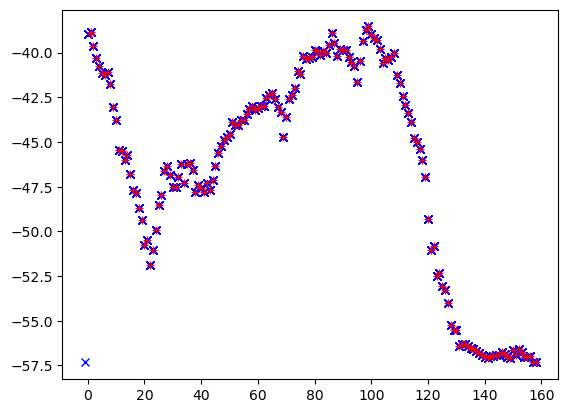

In [61]:
plt.plot(ds_argo_Rtraj['CYCLE_NUMBER'],ds_argo_Rtraj['LONGITUDE'],'xb')
plt.plot(ds_argo_Sprof['CYCLE_NUMBER'],ds_argo_Sprof['LONGITUDE'],'+r')
plt.show()

In [62]:
ds_argo_Rtraj_inair = ds_argo_Rtraj.where(ds_argo_Rtraj['MEASUREMENT_CODE'].isin([699,711,799]),drop=True)
ds_argo_Rtraj_inwater = ds_argo_Rtraj.where(ds_argo_Rtraj['MEASUREMENT_CODE'].isin([690,710]),drop=True)

In [63]:
ds_argo_Rtraj_inair['JULD']

<xarray.DataArray 'JULD' (N_MEASUREMENT: 1480)>
array(['2018-07-05T03:39:45.000000000', '2018-07-05T03:40:15.000000000',
       '2018-07-05T03:40:44.999999744', ...,
       '2022-10-24T07:23:08.000000000', '2022-10-24T07:23:38.000000000',
       '2022-10-24T07:24:07.999999744'], dtype='datetime64[ns]')
Coordinates:
    LONGITUDE  (N_MEASUREMENT) float64 -38.96 -38.96 -38.96 ... -57.34 -57.34
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:              Julian day (UTC) of each measurement relative to ...
    standard_name:          time
    conventions:            Relative julian days with decimal part (as parts ...
    resolution:             1.1574074074074073e-05
    axis:                   T
    comment_on_resolution:  JULD resolution is 1 second, except for measureme...
    casted:                 1

In [64]:
ds_argo_Rtraj_inwater

<xarray.Dataset>
Dimensions:                              (N_MEASUREMENT: 1470, N_PARAM: 8,
                                          N_CYCLE: 159, N_CALIB_PARAM: 1,
                                          N_CALIB_JULD: 1, N_HISTORY: 3)
Coordinates:
    LONGITUDE                            (N_MEASUREMENT) float64 -39.62 ... -...
Dimensions without coordinates: N_MEASUREMENT, N_PARAM, N_CYCLE, N_CALIB_PARAM,
                                N_CALIB_JULD, N_HISTORY
Data variables: (12/128)
    DATA_TYPE                            (N_MEASUREMENT) object 'Argo traject...
    FORMAT_VERSION                       (N_MEASUREMENT) object '3.2 ' ... '3...
    HANDBOOK_VERSION                     (N_MEASUREMENT) object '1.2 ' ... '1...
    REFERENCE_DATE_TIME                  (N_MEASUREMENT) datetime64[ns] 1950-...
    DATE_CREATION                        (N_MEASUREMENT) datetime64[ns] 2023-...
    DATE_UPDATE                          (N_MEASUREMENT) datetime64[ns] 2023-...
    ...                                   ...
    HISTORY_PARAMETER                    (N_MEASUREMENT, N_HISTORY) object ' ...
    HISTORY_PREVIOUS_VALUE               (N_MEASUREMENT, N_HISTORY) float32 n...
    HISTORY_INDEX_DIMENSION              (N_MEASUREMENT, N_HISTORY) object 'n...
    HISTORY_START_INDEX                  (N_MEASUREMENT, N_HISTORY) float64 n...
    HISTORY_STOP_INDEX                   (N_MEASUREMENT, N_HISTORY) float64 n...
    HISTORY_QCTEST                       (N_MEASUREMENT, N_HISTORY) object ' ...
Attributes:
    title:                        Argo float trajectory file
    institution:                  CORIOLIS
    source:                       Argo float
    history:                      2023-06-14T18:41:35Z creation; 2023-06-14T1...
    references:                   http://www.argodatamgt.org/Documentation
    user_manual_version:          3.4
    Conventions:                  Argo-3.2 CF-1.6
    featureType:                  trajectory
    decoder_version:              CODA_055r
    comment_on_resolution:        JULD and PRES variable resolutions depend o...
    comment_on_measurement_code:  Meaning of some specific measurement codes ...

-39.62478333333333
-39.62478333333333


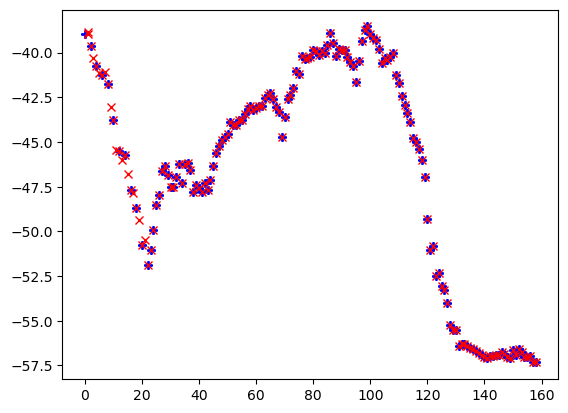

In [55]:
plt.plot(ds_argo_Rtraj_inair['CYCLE_NUMBER'],ds_argo_Rtraj_inair['LONGITUDE'],'+b')
plt.plot(ds_argo_Sprof['CYCLE_NUMBER'],ds_argo_Sprof['LONGITUDE'],'xr')
print(ds_argo_Sprof['LONGITUDE'][2].values)
print(ds_argo_Rtraj_inair['LONGITUDE'][10].values)